### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

# Data set for the Problem: Rose.csv

# Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [20, 8]

# Q 1: Read the data as an appropriate Time Series data and plot the data.

In [1]:
df_rose = pd.read_csv("Rose.csv", parse_dates=True, index_col=0)

NameError: name 'pd' is not defined

In [3]:
df_rose

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [4]:
df_rose.shape

(187, 1)

In [5]:
print("Minimum year-month value for Rose Wine Sample data :  ",df_rose.index.min())

Minimum year-month value for Rose Wine Sample data :   1980-01-01 00:00:00


In [6]:
print("Maximum year-month value for Rose Wine Sample data :  ",df_rose.index.max())

Maximum year-month value for Rose Wine Sample data :   1995-07-01 00:00:00


In [7]:
print("Describer for Rose  Wine Sample data :  ",df_rose.describe())

Describer for Rose  Wine Sample data :                Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000


### Yearly plot for Rose wine Sales data

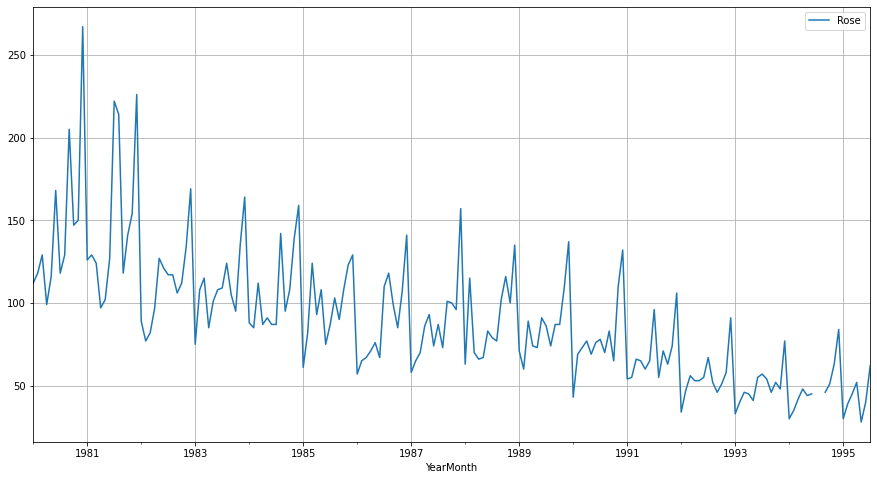

In [8]:
df_rose.plot(figsize=(15,8),grid=True);

### Box Plot for Year on year sales data for checking outliers and Comparing Medians for Rose wine

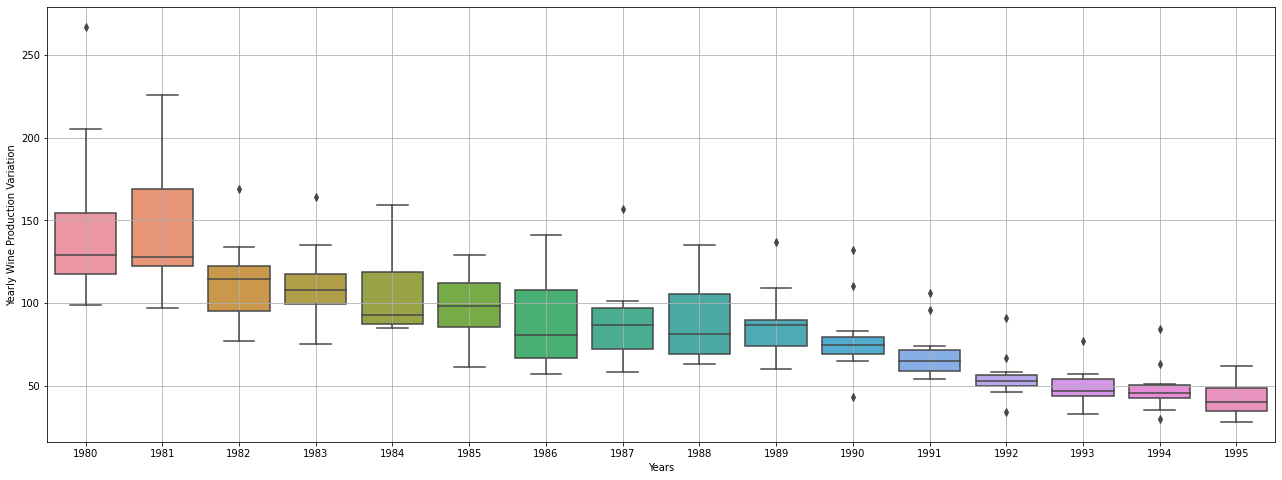

In [9]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_rose.index.year, y=df_rose["Rose"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

### Box plot for Wine Sale data for Rose wine for Monthly data considering alll years in account

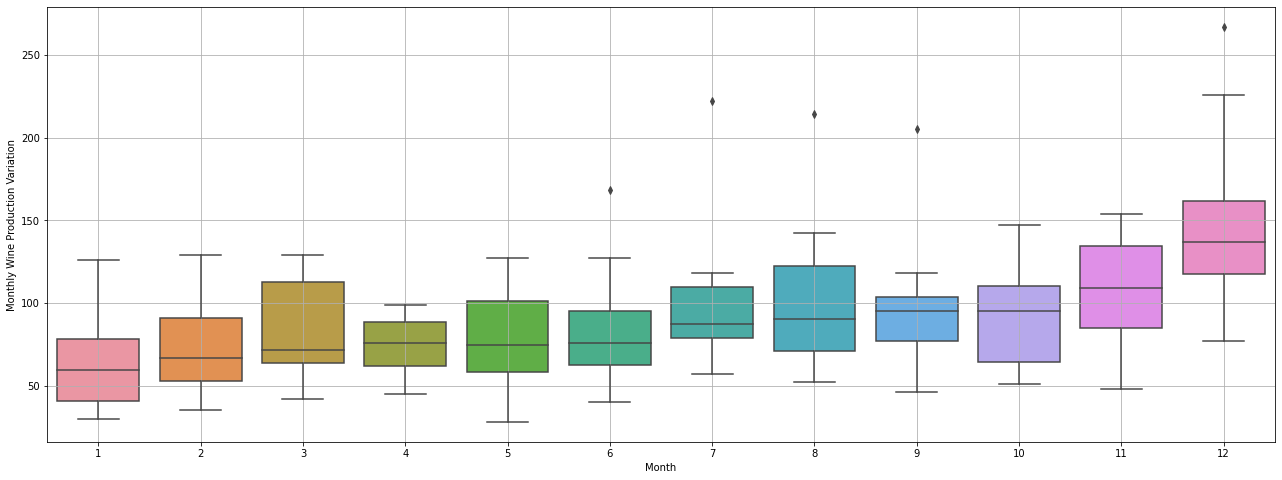

In [10]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_rose.index.month, y=df_rose["Rose"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Wine Production Variation');

## Q : 2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plot a monthplot of the give Time Series.

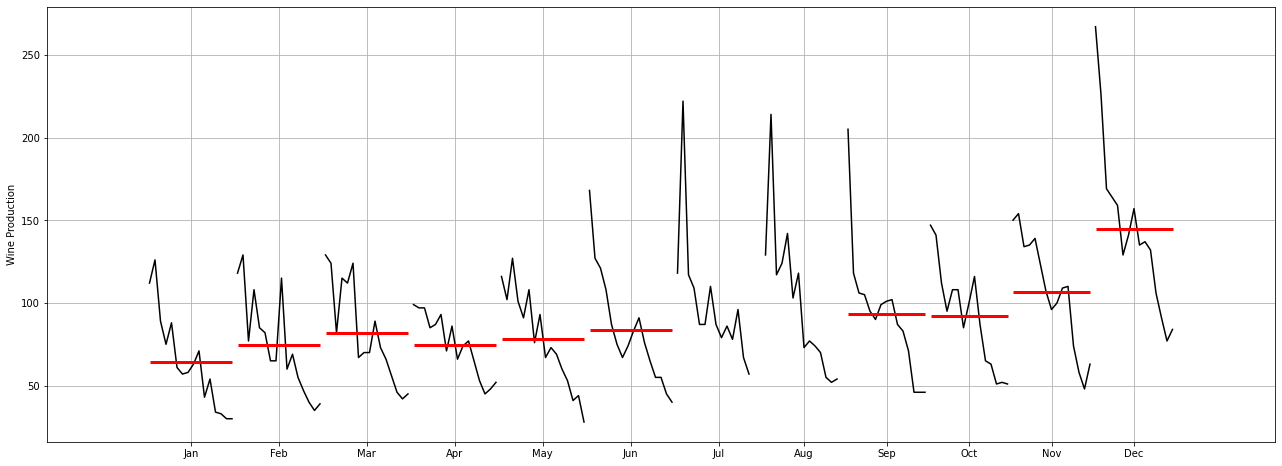

In [11]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_rose,ylabel='Wine Production',ax=ax)
plt.grid();

### Plot the Time Series according to different months for different years

In [12]:
yearly_sales_across_months = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, 
                                        index = df_rose.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


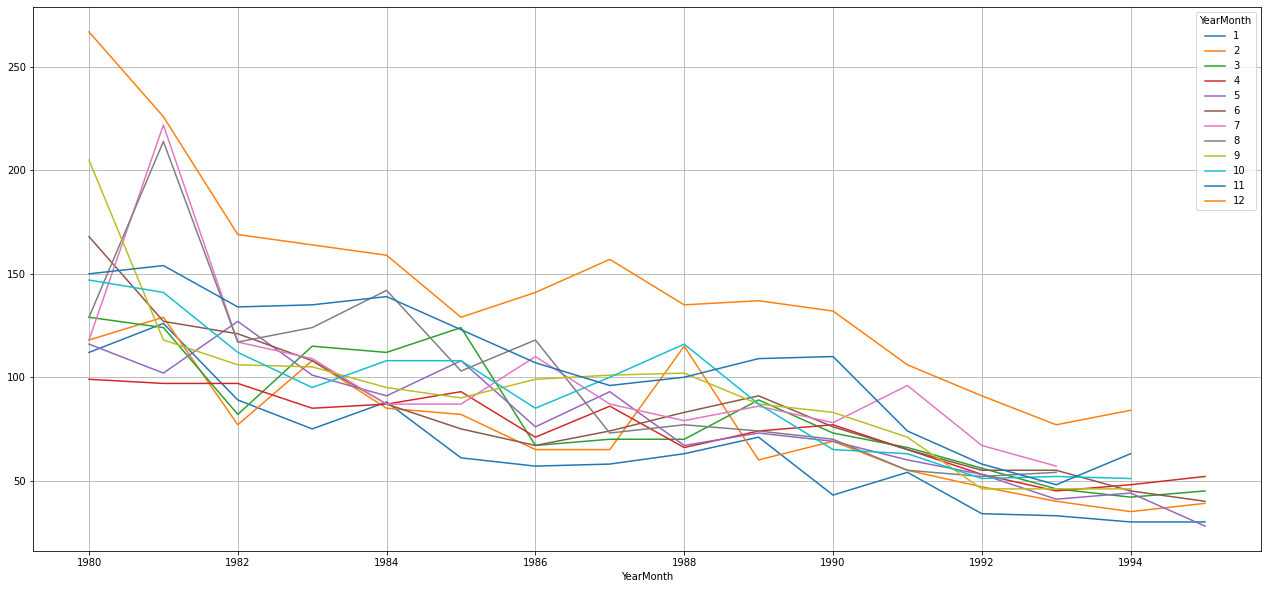

In [13]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Plot the average Sales per month and the month on month percentage change of RetailSales.

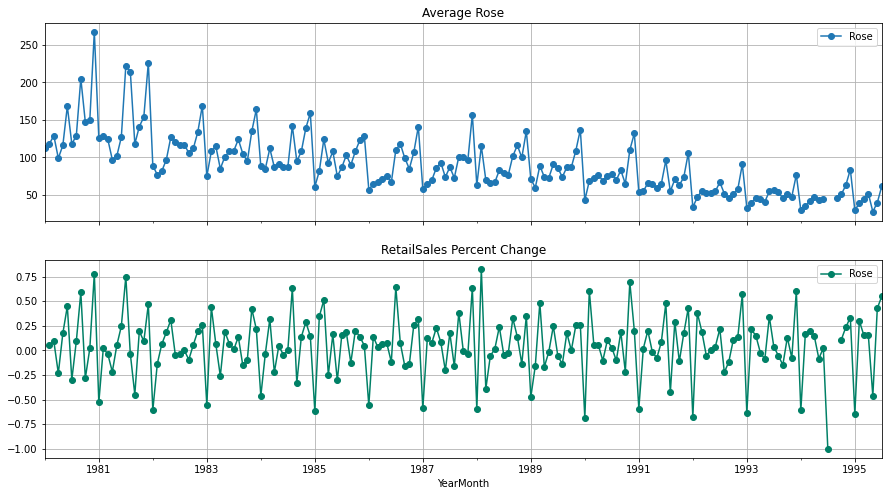

In [14]:
# group by date and get average RetailSales, and precent change
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

### Read this monthly data into a quarterly and yearly format.

### Yearly Plot 
### Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [15]:
df_yearly_sum = df_rose.resample('A').sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


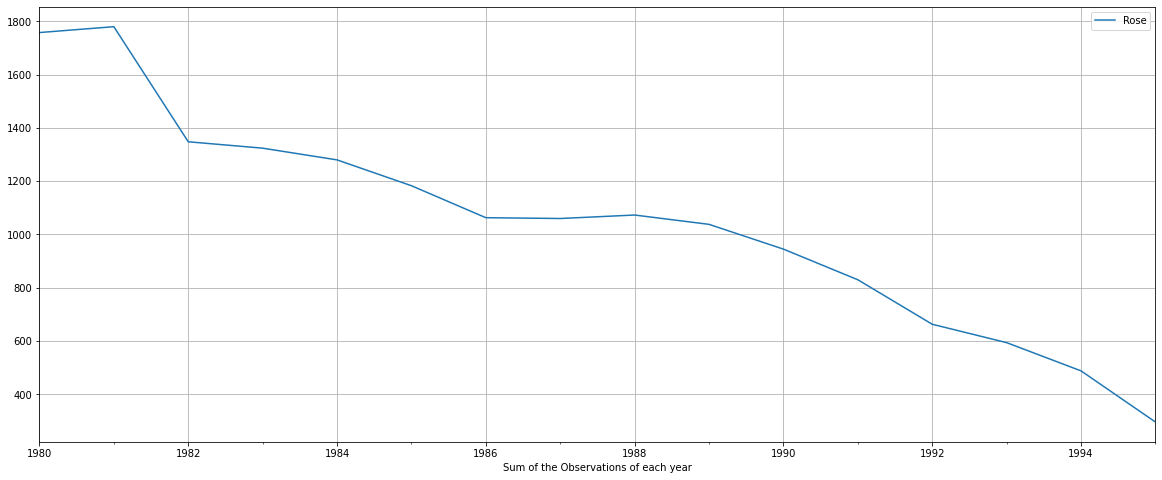

In [16]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [17]:
df_yearly_mean = df_rose.resample('Y').mean()
df_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


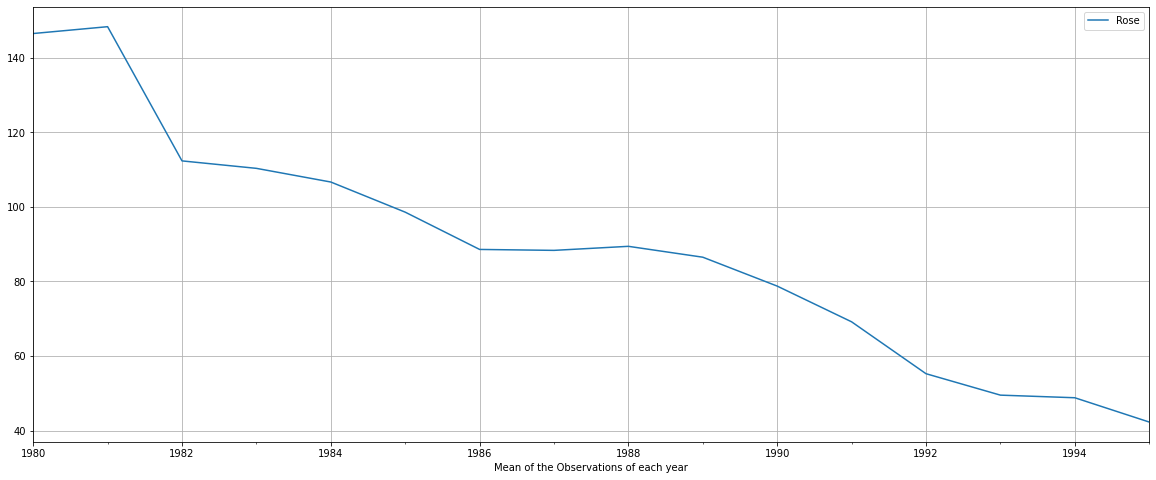

In [18]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

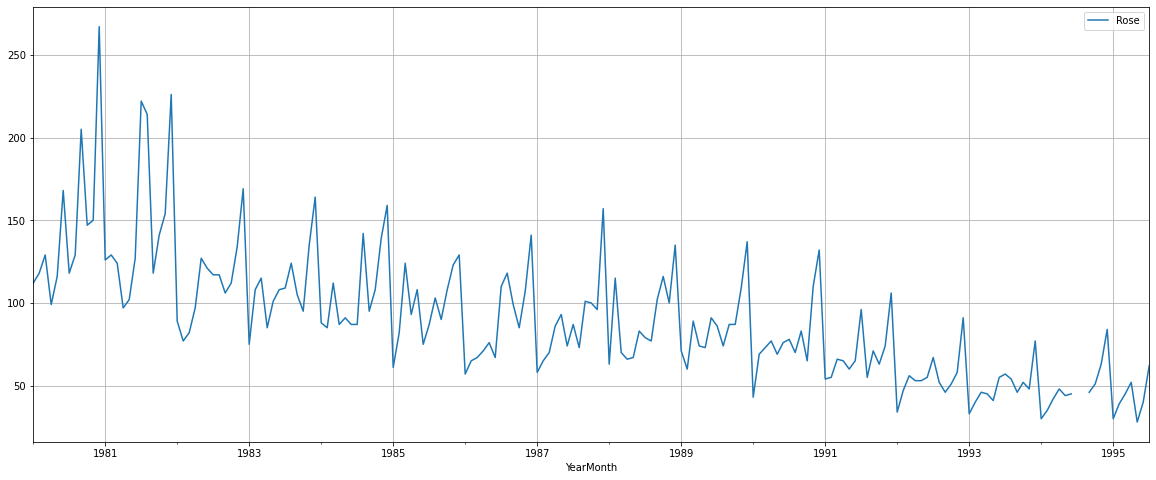

In [19]:
df_rose.plot()
plt.grid()

## Quarterly Plot

In [20]:
df_quarterly_sum = df_rose.resample('Q').sum()
df_quarterly_sum.head()

,Rose
YearMonth,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


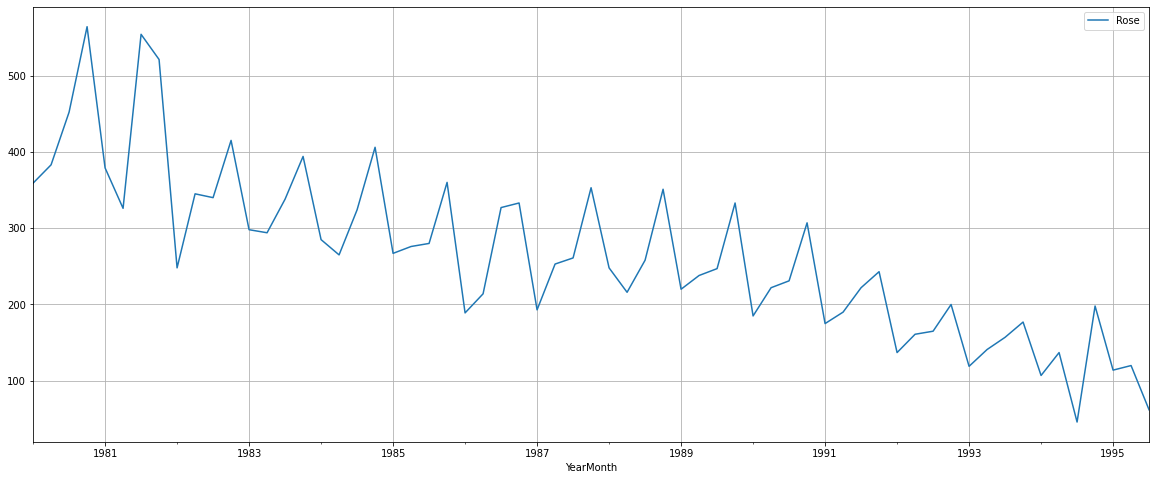

In [21]:
df_quarterly_sum.plot();
plt.grid()

In [22]:
df_quarterly_mean = df_rose.resample('Q').mean()
df_quarterly_mean.head()

,Rose
YearMonth,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


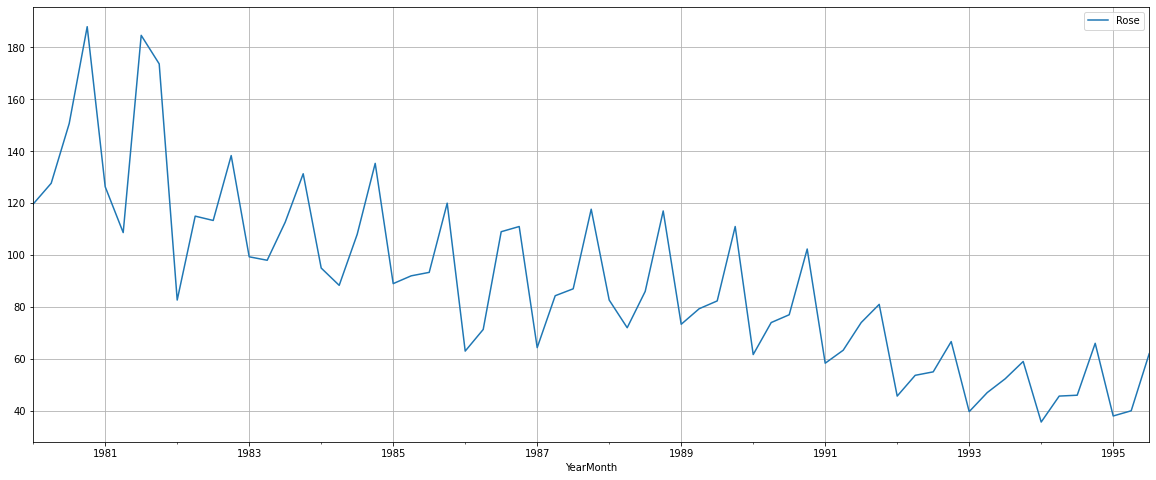

In [23]:
df_quarterly_mean.plot();
plt.grid()

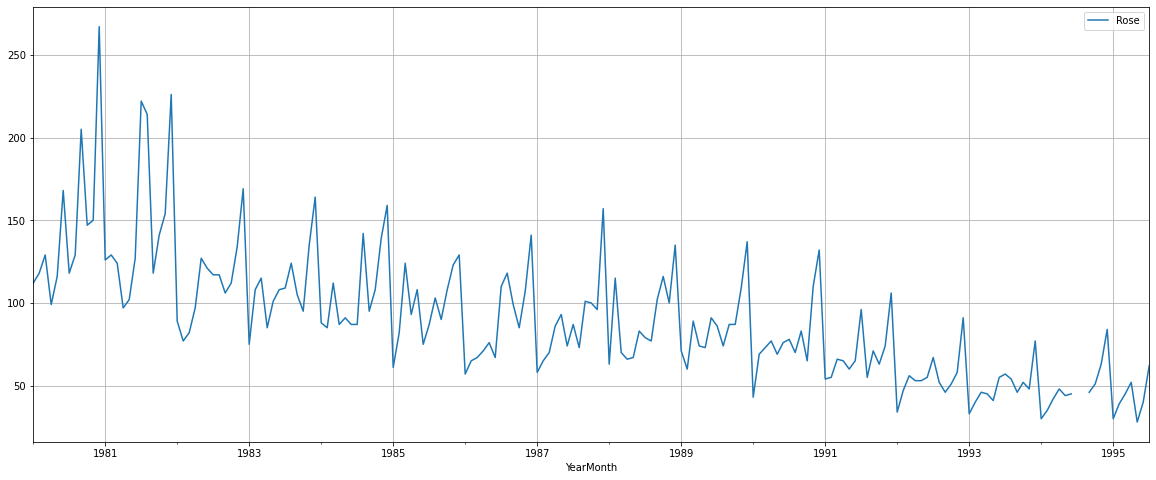

In [24]:
df_rose.plot()
plt.grid();

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [25]:
df_daily_sum = df_rose.resample('D').sum()
df_daily_sum

,Rose
YearMonth,
1980-01-01,112.0
1980-01-02,0.0
1980-01-03,0.0
1980-01-04,0.0
1980-01-05,0.0
...,...
1995-06-27,0.0
1995-06-28,0.0
1995-06-29,0.0


The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

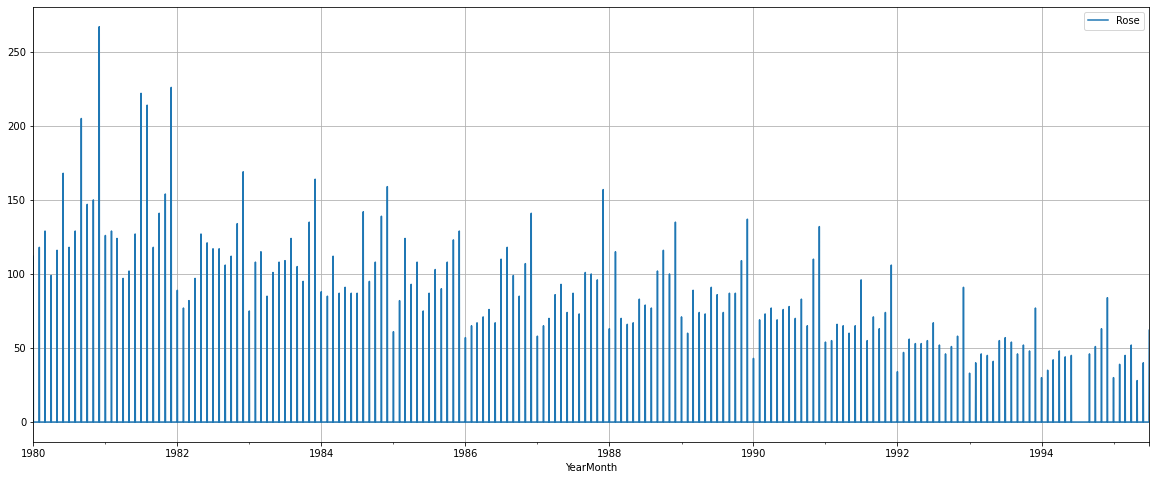

In [26]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [27]:
df_decade_sum = df_rose.resample('10Y').sum()
df_decade_sum

,Rose
YearMonth,
1980-12-31,1758.0
1990-12-31,12094.0
2000-12-31,2871.0


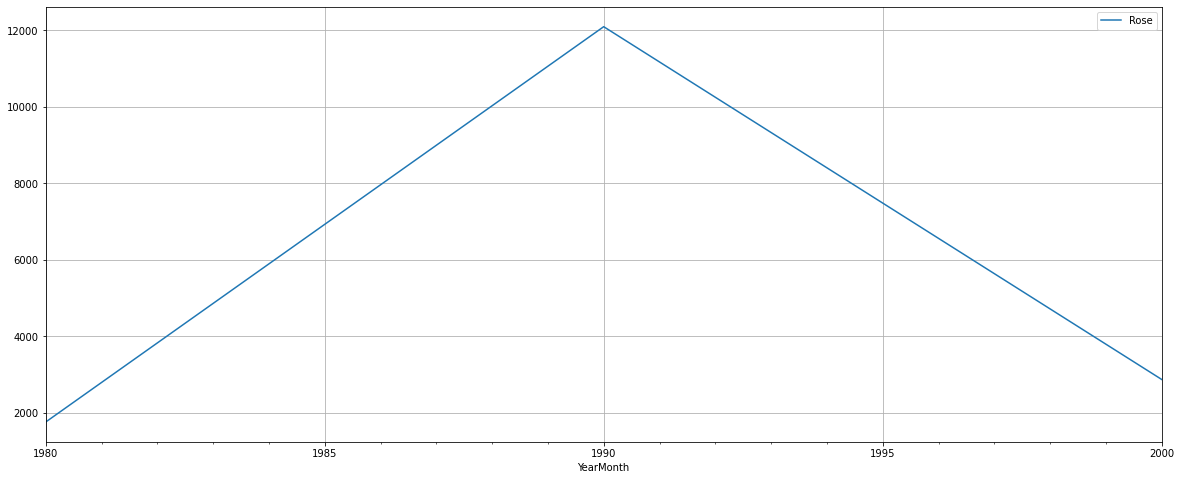

In [28]:
df_decade_sum.plot();
plt.grid()

## Decompose the Time Series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

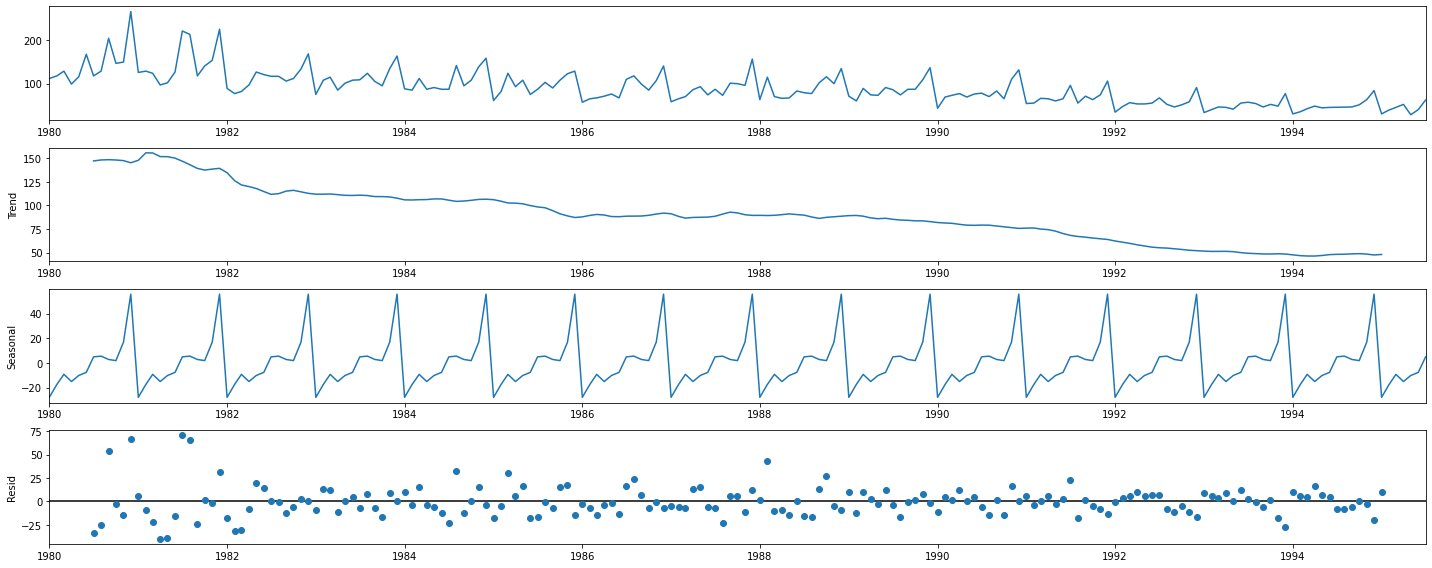

In [30]:
## Deal with missing values , if any
df_rose.interpolate(inplace=True)

decomposition = seasonal_decompose(df_rose,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the data. There is a seasonality as well.

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [32]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

In [33]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    113.103092
1980-08-01    123.500314
1980-09-01    202.225314
1980-10-01    145.128092
1980-11-01    133.153092
1980-12-01    211.286425
dtype: float64

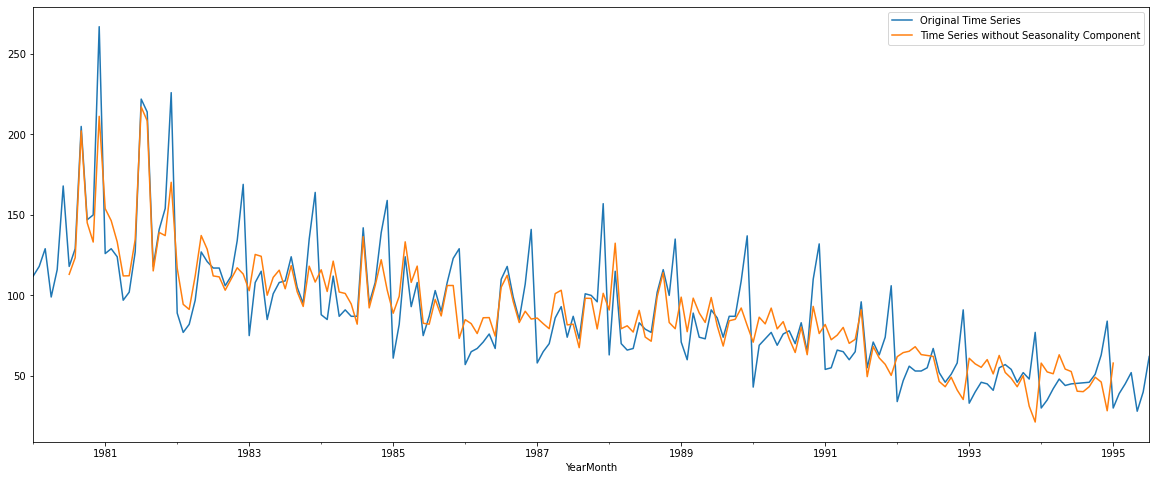

In [34]:
df_rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [35]:
df_rose.isnull().sum()

Rose    0
dtype: int64

### multiplicative Model for Rose data problem

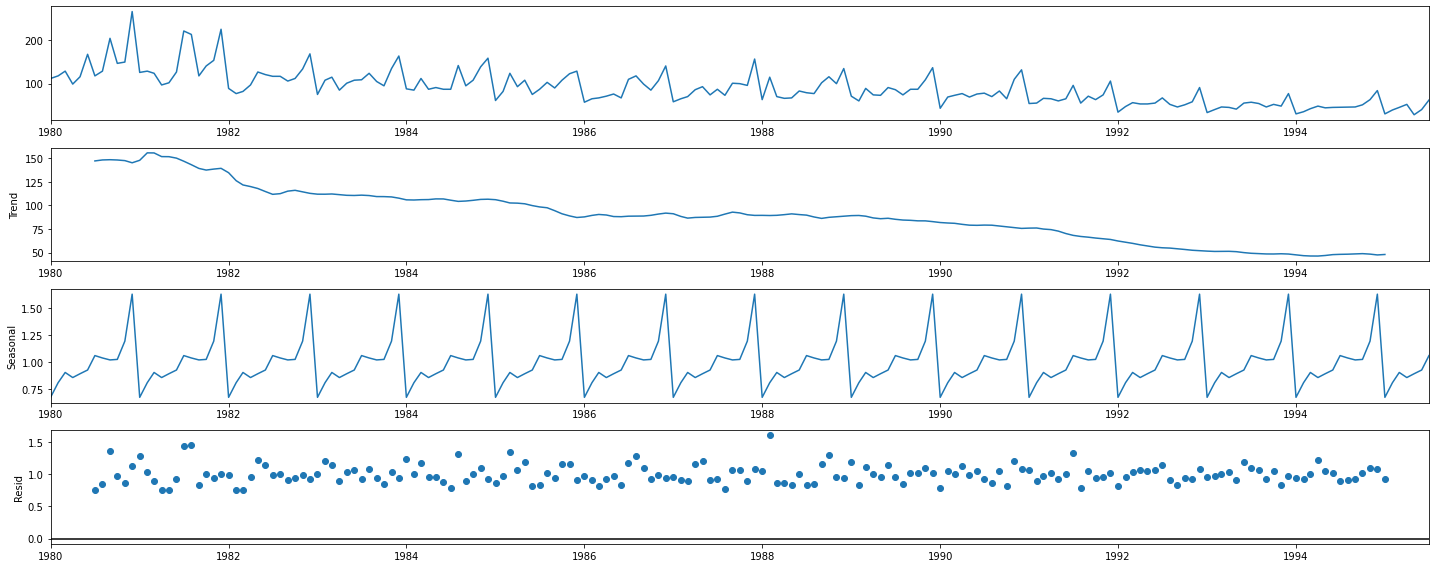

In [36]:
decomposition = seasonal_decompose(df_rose,model='multiplicative')
decomposition.plot();

Since Residual is more close to a single line, we would choose Additive Decomposition over Multiplicative decomposion

## Q 3: Split the data into training and test. The test data should start in 1991.

In [37]:
train = df_rose[df_rose.index<'1991'] 
test  = df_rose[df_rose.index>='1991']

In [38]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [39]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



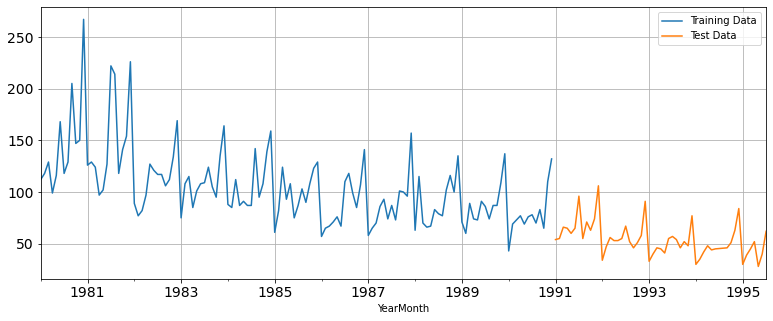

In [40]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Q : 4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [41]:
df_rose_2=df_rose.copy()

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯  to build the model on the training data and test the model on the test data.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

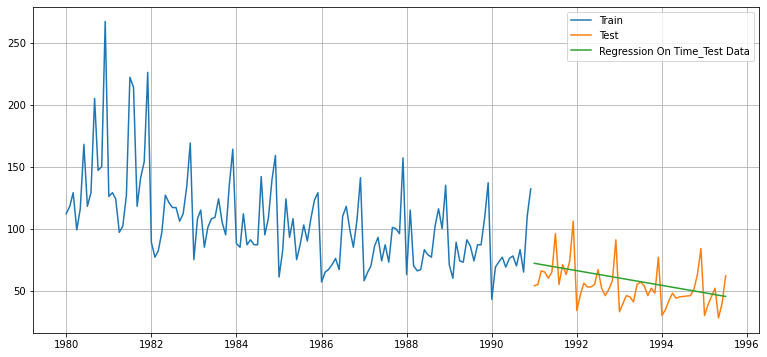

In [48]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics

In [49]:
from sklearn import metrics

### Model Evaluation

In [50]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [51]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


## Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [52]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [53]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

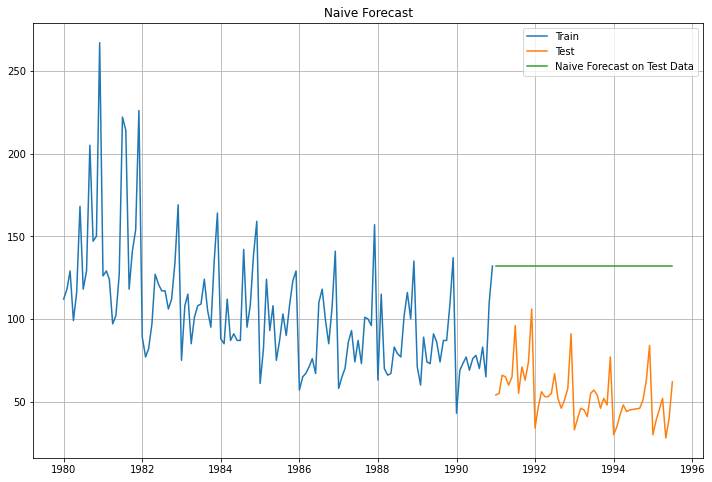

In [54]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [55]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [56]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


### Method 3: Simple Average

In [57]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [58]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


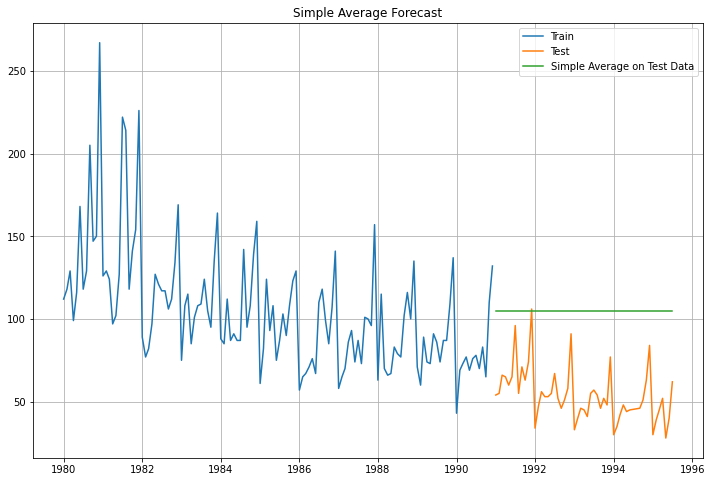

In [59]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [60]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [61]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


### Method 4: Moving Average(MA)

### For Moving Average, we are going to average over the entire data

In [62]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


### Trailing moving averages

In [63]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_3,Trailing_4,Trailing_6
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,119.666667,NaN,NaN
1980-04-01,99.0,114.0,115.333333,114.5,NaN
1980-05-01,116.0,107.5,114.666667,115.5,NaN


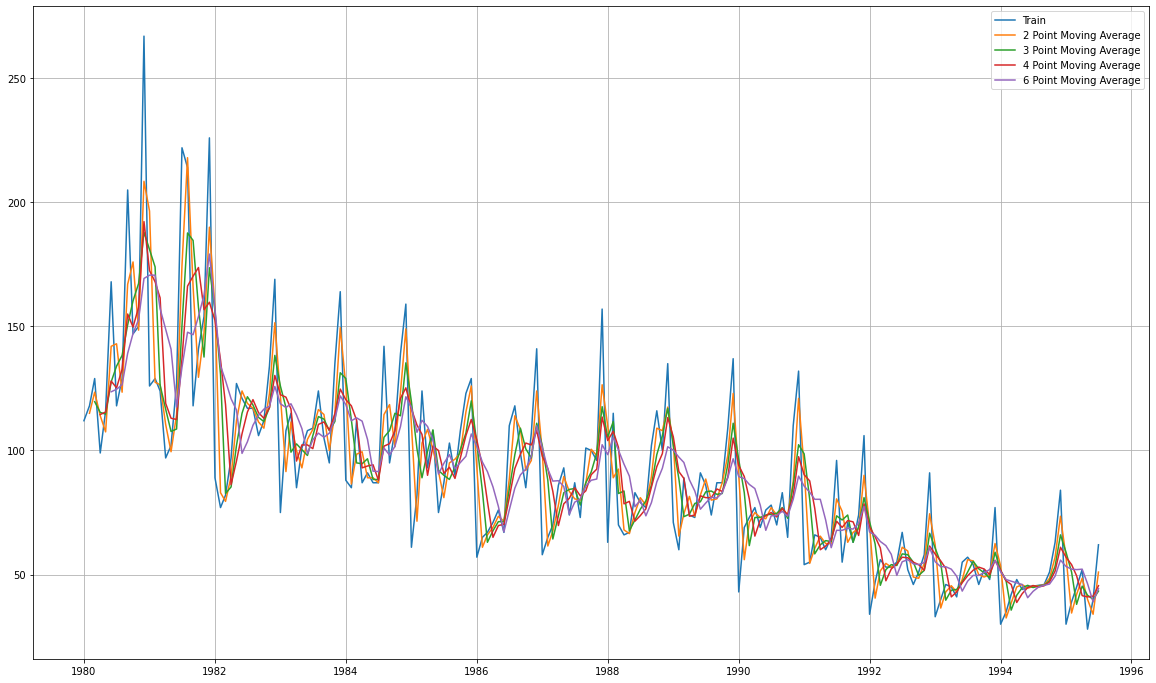

In [64]:
## Plotting on the whole data
plt.figure(figsize=(20,12))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [65]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_rose.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[df_rose.index>='1991']

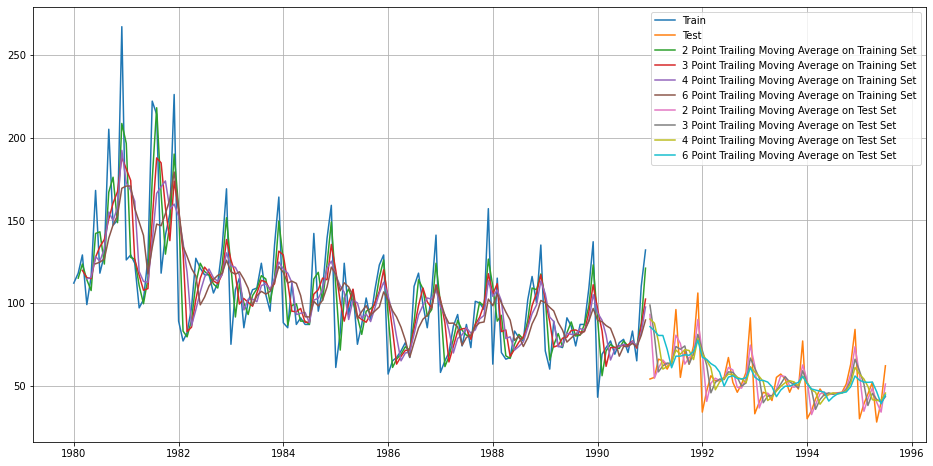

In [66]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label = '4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [67]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_Mov_Avg_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_Mov_Avg_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_3))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_Mov_Avg_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_Mov_Avg_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_6))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.127
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566


In [68]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_Mov_Avg_test_2,rmse_Mov_Avg_test_3
                                          ,rmse_Mov_Avg_test_4,rmse_Mov_Avg_test_6]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'4pointTrailingMovingAverage','6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

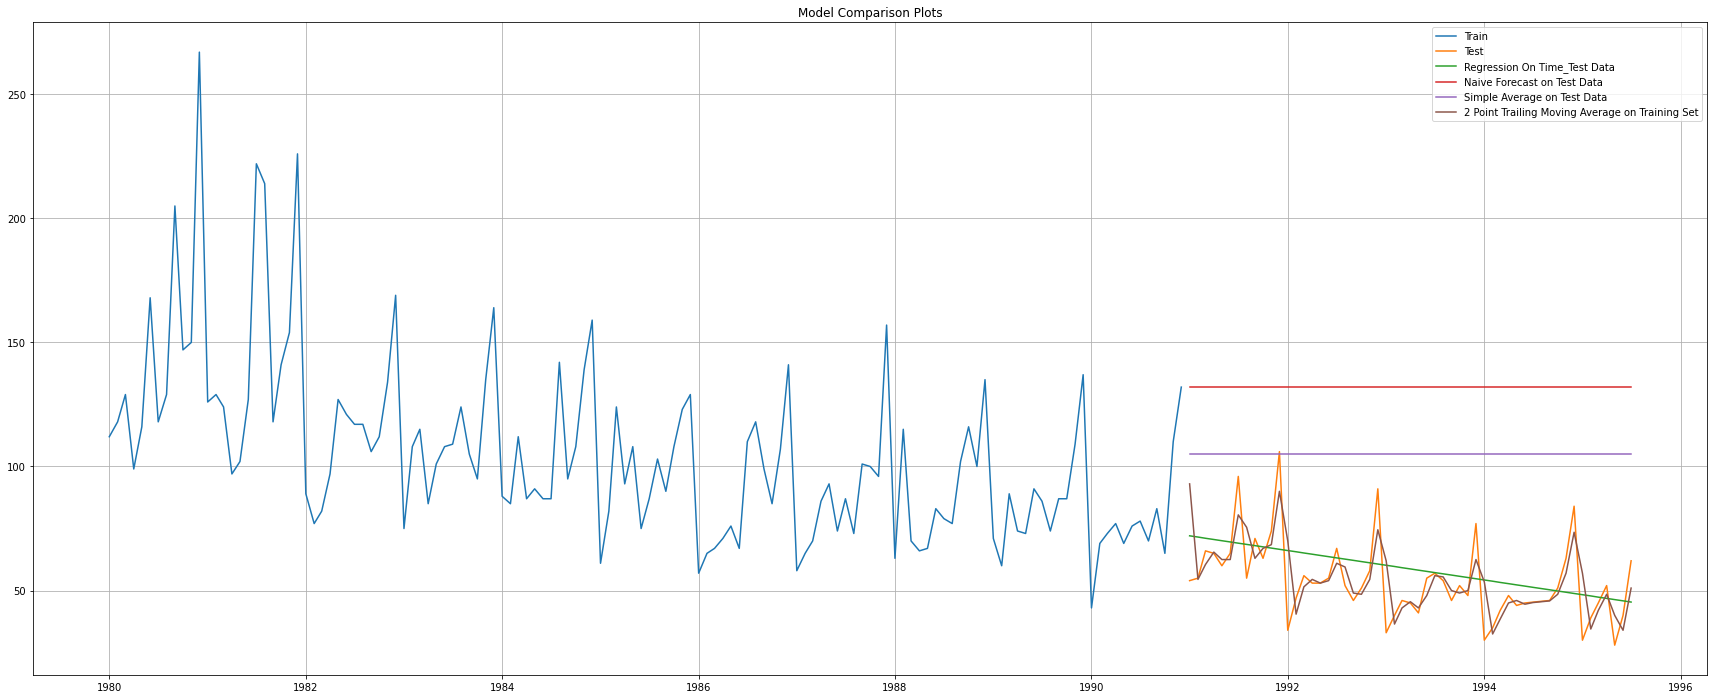

In [69]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [71]:
SES_train = train.copy()
SES_test = test.copy()

In [72]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_SES_autofit = model_SES.fit(optimized=True)

In [74]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104999
1991-02-01,55.0,87.104999
1991-03-01,66.0,87.104999
1991-04-01,65.0,87.104999
1991-05-01,60.0,87.104999


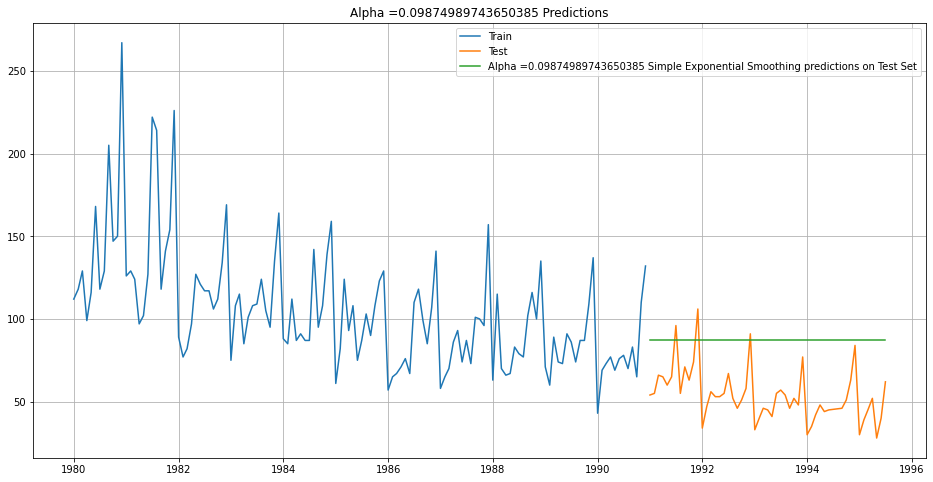

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09874989743650385 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09874989743650385 Predictions');

### Model Evaluation for  𝛼  = 0.09874989743650385 : Simple Exponential Smoothing

In [77]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.09874989743650385 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.09874989743650385 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [78]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098749,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242


Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [79]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [80]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [81]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
6,0.07,32.046904,36.435772
7,0.08,31.936243,36.462965
5,0.06,32.209657,36.580469
8,0.09,31.862435,36.604118
9,0.10,31.815610,36.828033
...,...,...,...
94,0.95,38.112735,78.532696
95,0.96,38.243543,78.786884
96,0.97,38.376021,79.032686
97,0.98,38.510198,79.270003


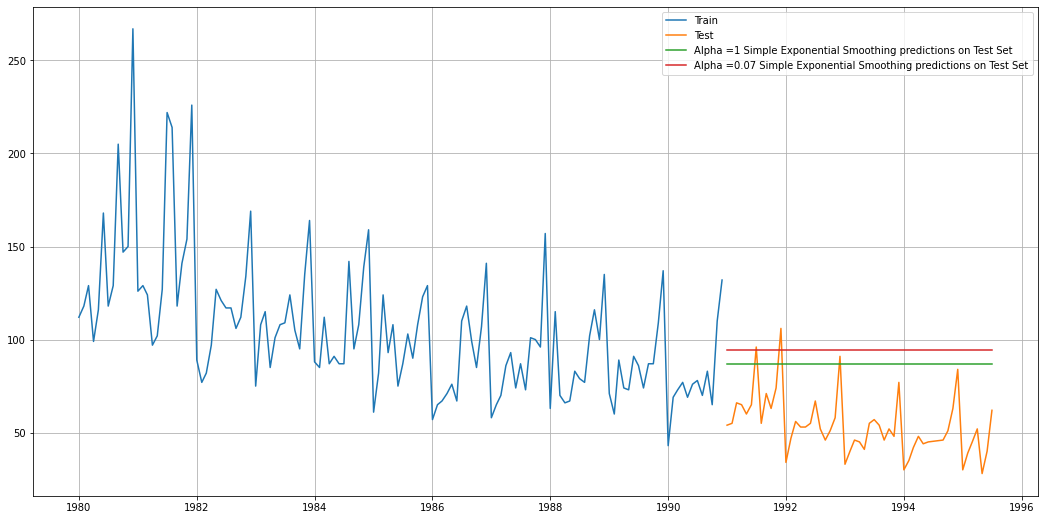

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772


### Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [84]:
DES_train = train.copy()
DES_test = test.copy()

In [85]:
model_DES = Holt(DES_train['Rose'])

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [88]:
resultsDf_7.sort_values(by="Test RMSE")

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.923416
1,0.1,0.2,33.450729,48.688648
10,0.2,0.1,33.097427,65.731702
2,0.1,0.3,33.145789,78.156641
20,0.3,0.1,33.611269,98.653317
...,...,...,...,...
78,0.8,0.9,51.756649,1052.464792
68,0.7,0.9,48.539838,1061.847942
79,0.8,1.0,53.844112,1095.112285
59,0.6,1.0,47.190957,1102.085828


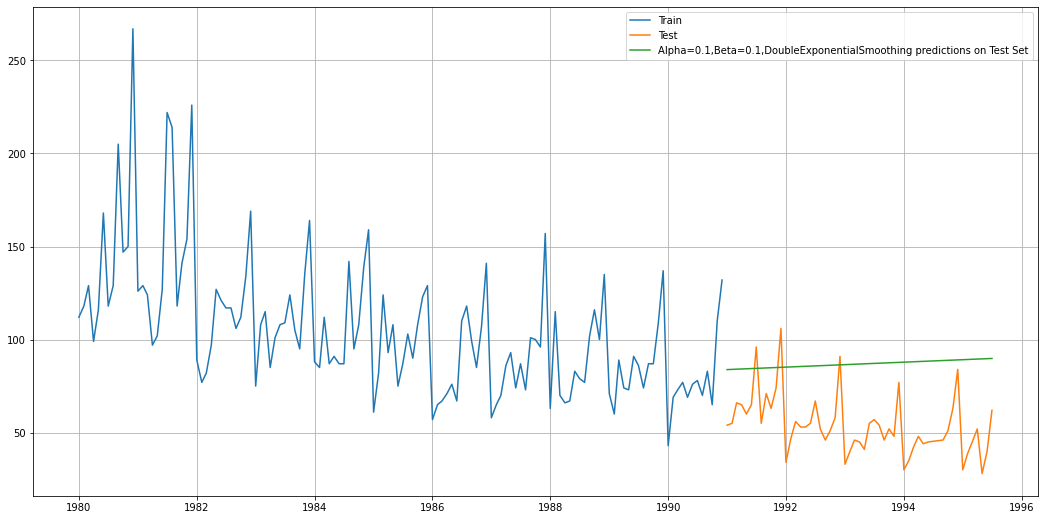

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923416


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [93]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,55.942246
1991-02-01,55.0,63.240624
1991-03-01,66.0,68.899674
1991-04-01,65.0,60.007486
1991-05-01,60.0,67.257150


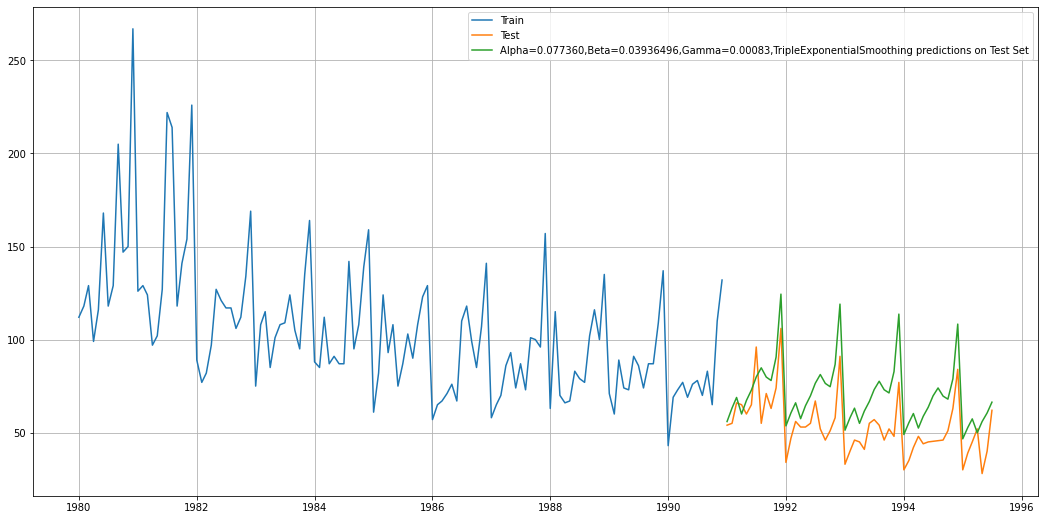

In [96]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.077360,Beta=0.03936496,Gamma=0.00083,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [97]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.077360,Beta=0.03936496,Gamma=0.00083, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.077360,Beta=0.03936496,Gamma=0.00083, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.113


In [98]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.077360,Beta=0.03936496,Gamma=0.00083,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923416


In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [100]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',round(i,1),round(j,1),round(k,1)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,1),round(j,1),round(k,1)] = model_TES_alpha_i_j_k.forecast(steps=55)
            
            rmse_model8_train = np.round(metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',round(i,1),round(j,1),round(k,1)],squared=False),2)
            
            rmse_model8_test = np.round(metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',round(i,1),round(j,1),round(k,1)],squared=False),2)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [101]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
9,0.1,0.2,0.1,19.77,9.22
10,0.1,0.2,0.2,20.25,9.50
127,0.2,0.6,0.2,23.13,9.57
119,0.2,0.5,0.3,23.66,9.89
11,0.1,0.2,0.3,20.87,9.89


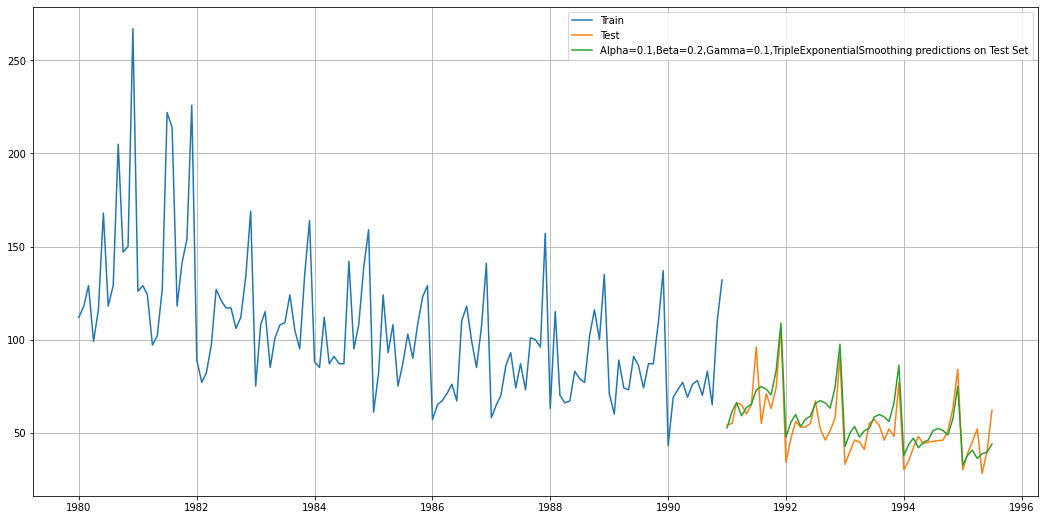

In [102]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [103]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

FInal_results = pd.concat([resultsDf, resultsDf_8_3])
FInal_results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923416


In [104]:
print('Sorted by RMSE values on the Test Data:','\n',)
FInal_results.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",9.220000
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
RegressionOnTime,15.268955
"Alpha=0.077360,Beta=0.03936496,Gamma=0.00083,TripleExponentialSmoothing",19.113110
"Alpha=0.07,SimpleExponentialSmoothing",36.435772
"Alpha=0.098749,SimpleExponentialSmoothing",36.796242
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923416


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.1 ,  𝛽  = 0.2 and  𝛾  = 0.1.

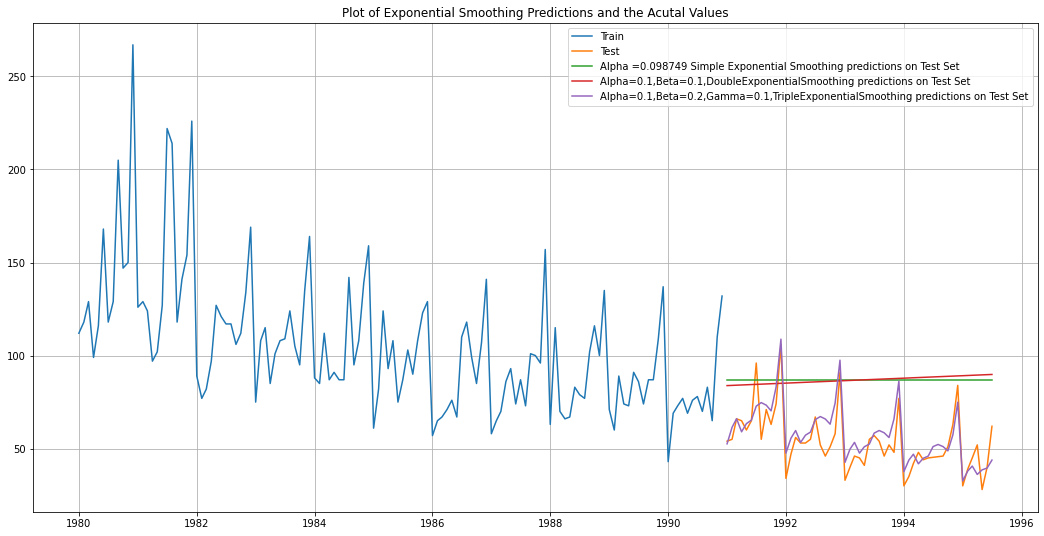

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.09], label='Alpha =0.098749 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 1 model which gave us the best accuracy (least RMSE).

## Q 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

### AUTO REGRESSIVE Models
### Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models.

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods.

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models.

### Lags
Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

### White noise of the residuals:

White noise is a process of residuals  ϵt  that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive (AR) Models
Auto-Regression is a regression of a variable on itself measured at different time points. Auto-Regressive model with lag 1, AR(1) is given by

Yt+1=βYt+ϵt+1  and this same as
 Yt+1−μ=β(Yt−μ)+ϵt+1  and this same as
 where  ϵt+1  is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation.
 Yt+1−μ  is interpreted as a deviation from mean value  mu  and known as mean centered series.
 The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. The null hypothesis is that time series is non-stationary. Alternative hypothesis is that time series is stationary.

### AR Model indentification
 Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)
 Autocorrelation Function (ACF)
 A plot of auto-correlation of different lags is called ACF.

 The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

### Partial Autocorrelation Function (PACF)
 A plot of partial auto-correlation for different values of lags is called PACF.

 The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

 Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

 The number of lags is p when:

 The partial auto-correlation, | ρpk | > 1.96 /  n−−√  for first p values and cuts off to zero.
 The auto-correlation function,  ρk  decreases exponentially.
 * The model is AR of order p when the PACF cuts-off after a lag p.

 * The model is MA of order p when the ACF cuts-off after a lag q.

 * The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

 For an ARIMA (p,d,q) process, it becomes non-stationary to stationary after differencing it for d times

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [106]:
from statsmodels.tsa.stattools import adfuller

In [107]:
dftest = adfuller(df_rose,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793189
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over ℎ𝑒𝑟𝑒.

Let us take one level of differencing to see whether the series becomes stationary.

In [108]:
dftest = adfuller(df_rose.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827045e-11
Number of lags used 12


Now, let us go ahead and plot the stationary series.

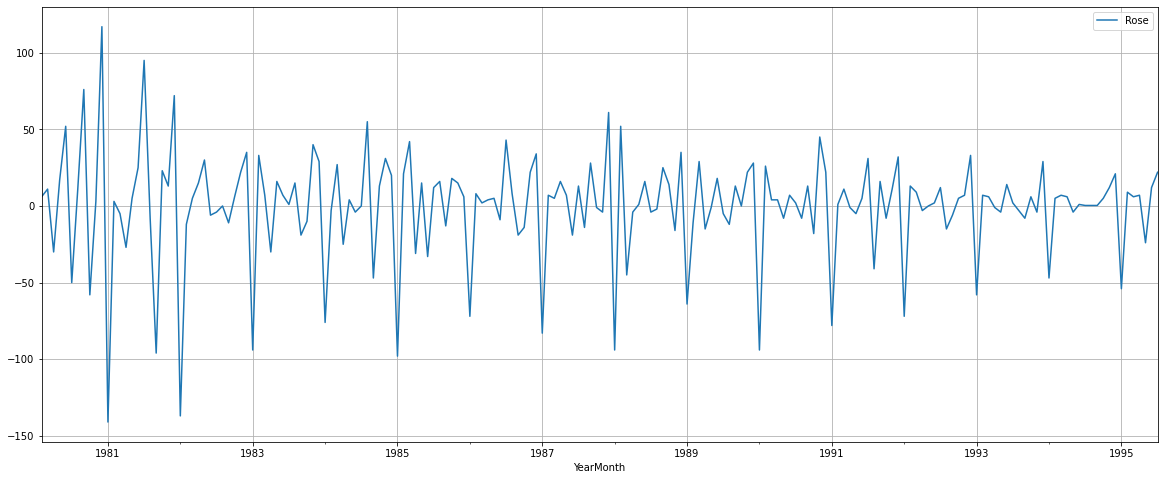

In [109]:
df_rose.diff().dropna().plot(grid=True);

### Split the data into train and test and plot the training and test data.
#### Training Data is till the end of 1991. Test Data is from the beginning of 1991 to the last time stamp provided.

In [110]:
df_rose.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [111]:
train = df_rose[df_rose.index<'1991'] 
test = df_rose[df_rose.index>='1991']

In [112]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [113]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [114]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Check for stationarity of the Training Data Time Series.

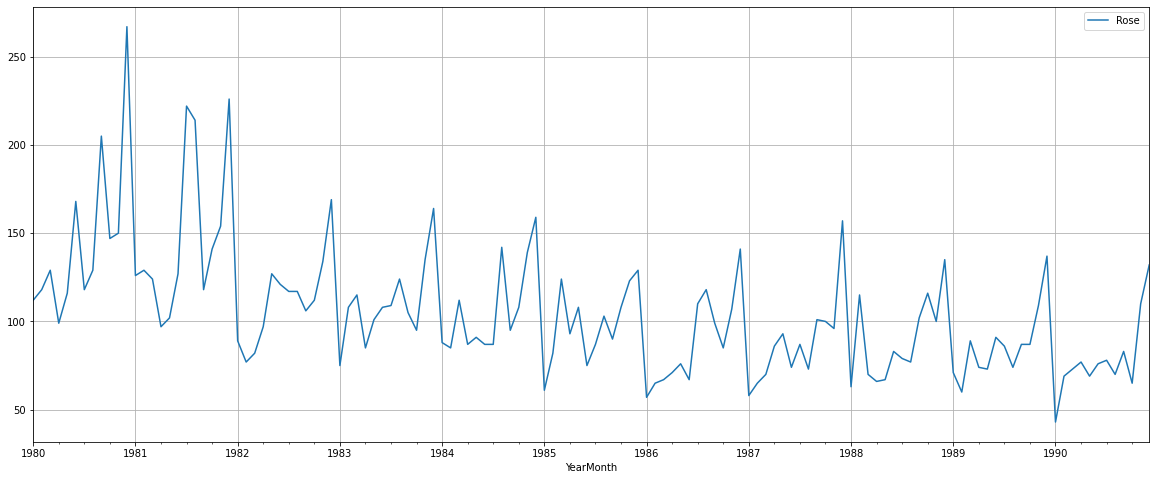

In [115]:
train.plot(grid=True);

In [116]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051046977
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [117]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356783185e-08
Number of lags used 12


Now, let us go ahead and plot the differenced training data.

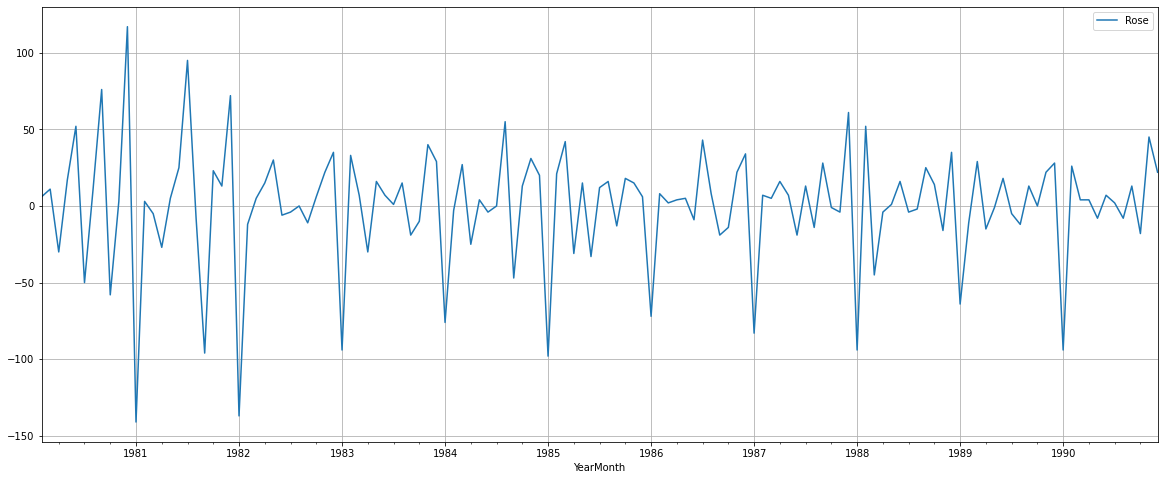

In [118]:
train.diff().dropna().plot(grid=True);

### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Q 6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Q 7 :Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

### Build Automated ARIMA Model

In [120]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [122]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.574229538006
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309964
ARIMA(2, 1, 0) - AIC:1298.6110341604958
ARIMA(2, 1, 1) - AIC:1281.5078621868606
ARIMA(2, 1, 2) - AIC:1281.8707222264304


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6951493753345
ARIMA(3, 1, 0) - AIC:1297.481091727174
ARIMA(3, 1, 1) - AIC:1282.4192776271934
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6699617388035


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695149
15,"(3, 1, 3)",1278.669962
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [124]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 24 Aug 2022   AIC                           1274.695
Time:                        22:38:26   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6777      0.084    -20.037      0.000      -1.842      -1.514
ar.L2         -0.7285      0.084     -8.701      0.000      -0.893      -0.564
ma.L1          1.0445      0.650      1.606      0.1

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Diagnostics plot.

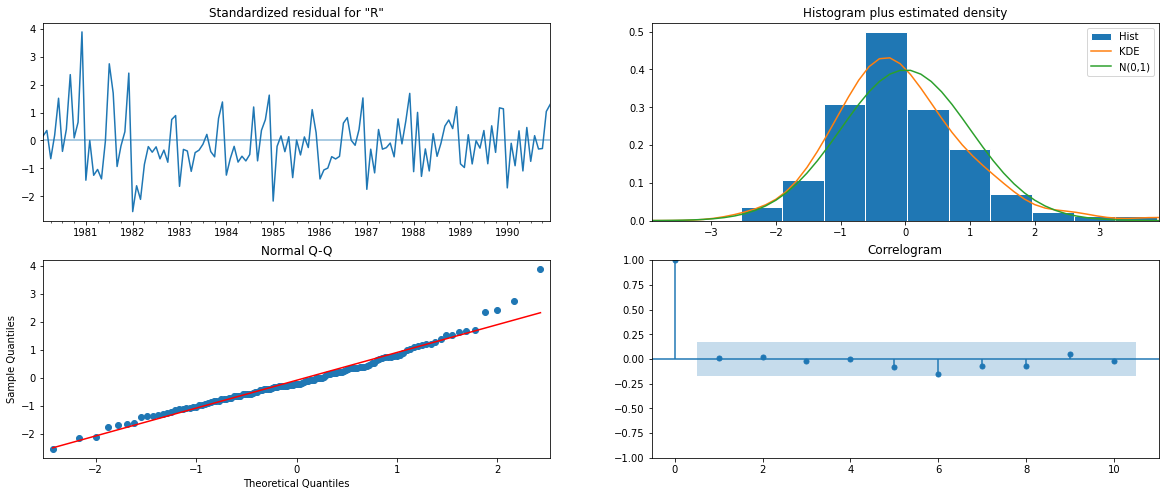

In [125]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model

In [126]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [127]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [128]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.80932446180966 
MAPE: 75.83104729579773


In [129]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Auto_ARIMA(2,1,3)'])

resultsDf

,RMSE
"Auto_ARIMA(2,1,3)",36.809324


### Build Manual ARIMA Model

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

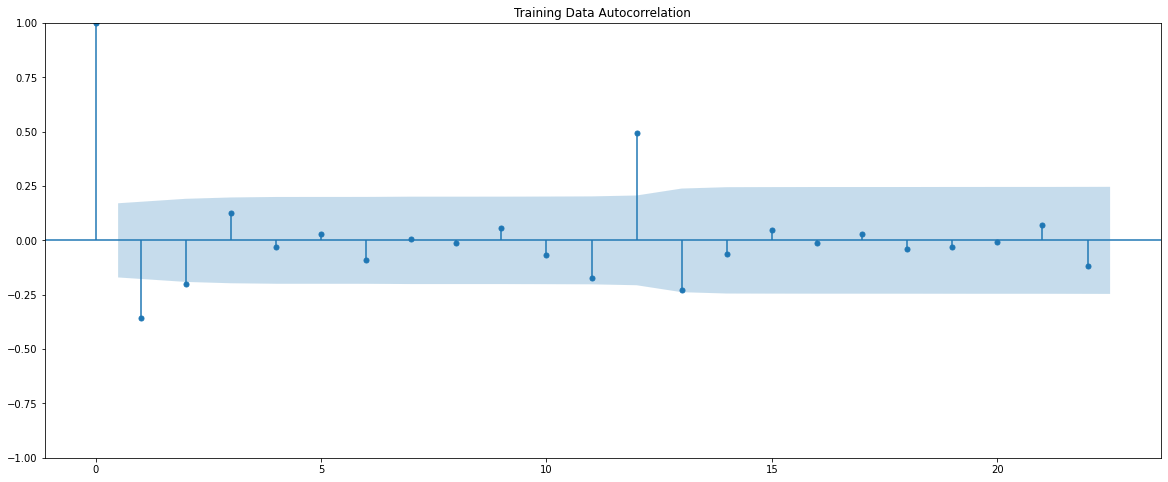

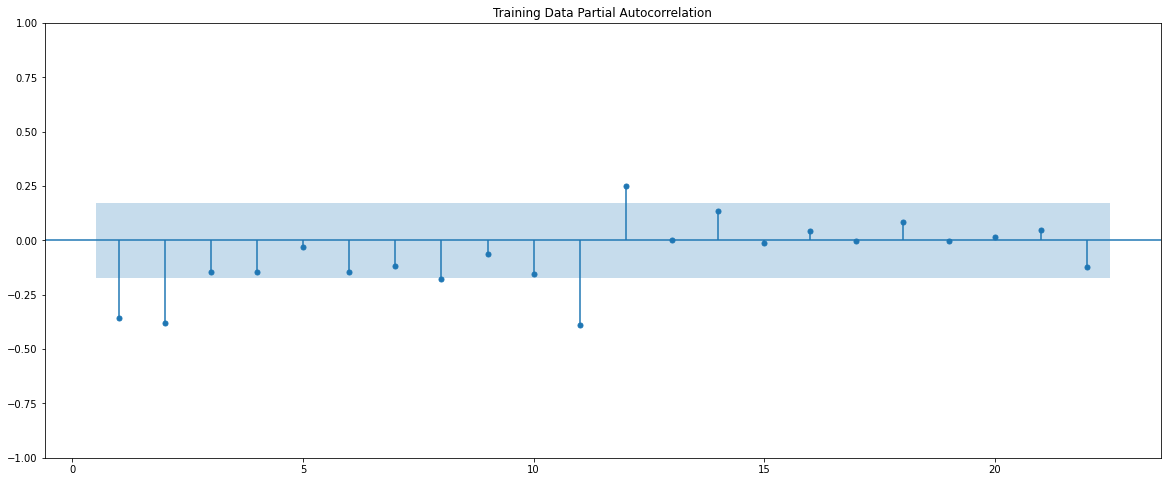

In [131]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [132]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 24 Aug 2022   AIC                           1281.871
Time:                        22:38:27   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Let us analyse the residuals from the various diagnostics plot.

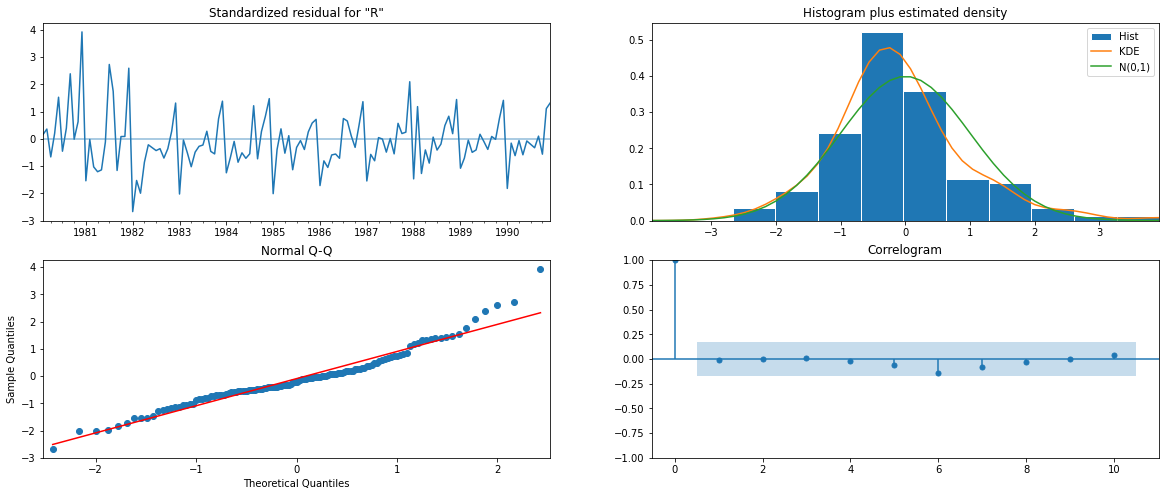

In [133]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model

In [134]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [135]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119662176807 
MAPE: 76.05621272229534


In [136]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Manual_ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"Auto_ARIMA(2,1,3)",36.809324
"Manual_ARIMA(2,1,2)",36.871197


### Build an Manual version of a SARIMA model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

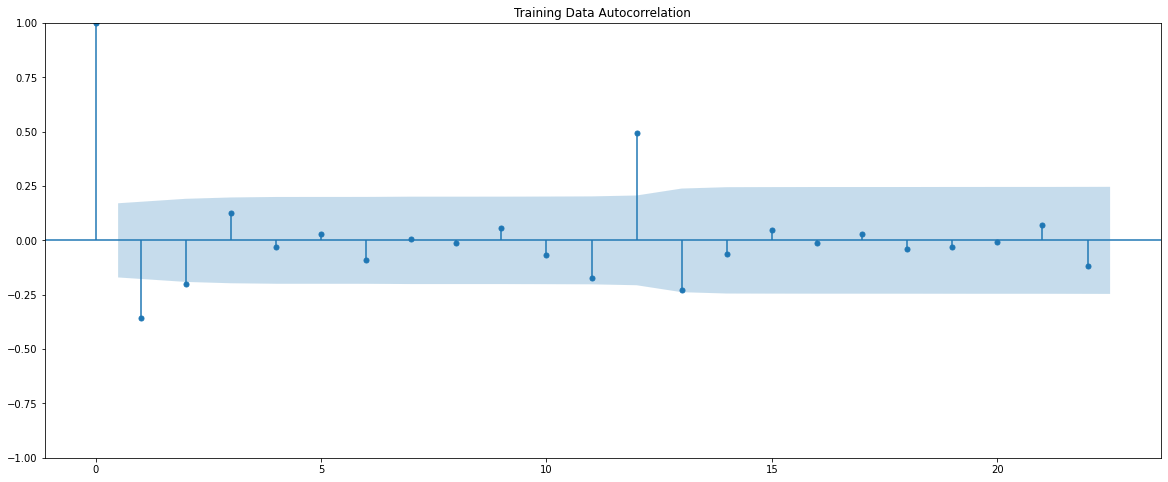

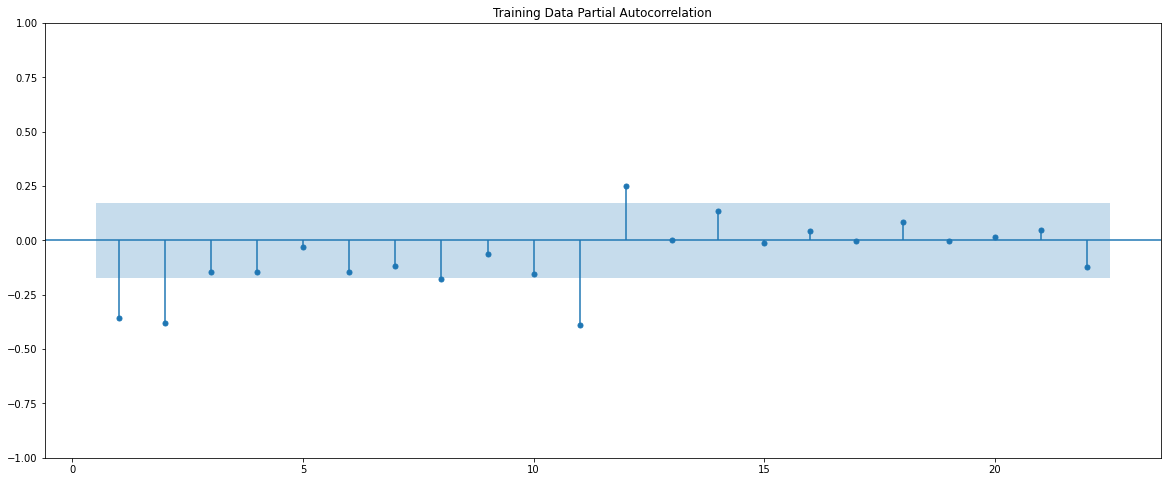

In [137]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');
plt.show()

We can not see that there is a seasonality.
and P value and Q value would be 0 from above graphs

In [138]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 6)   Log Likelihood                -634.370
Date:                            Wed, 24 Aug 2022   AIC                           1278.739
Time:                                    22:38:28   BIC                           1292.759
Sample:                                01-01-1980   HQIC                          1284.434
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1123      0.055     20.150      0.000       1.004       1.220
ar.L2         -0.3756      0.029   

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


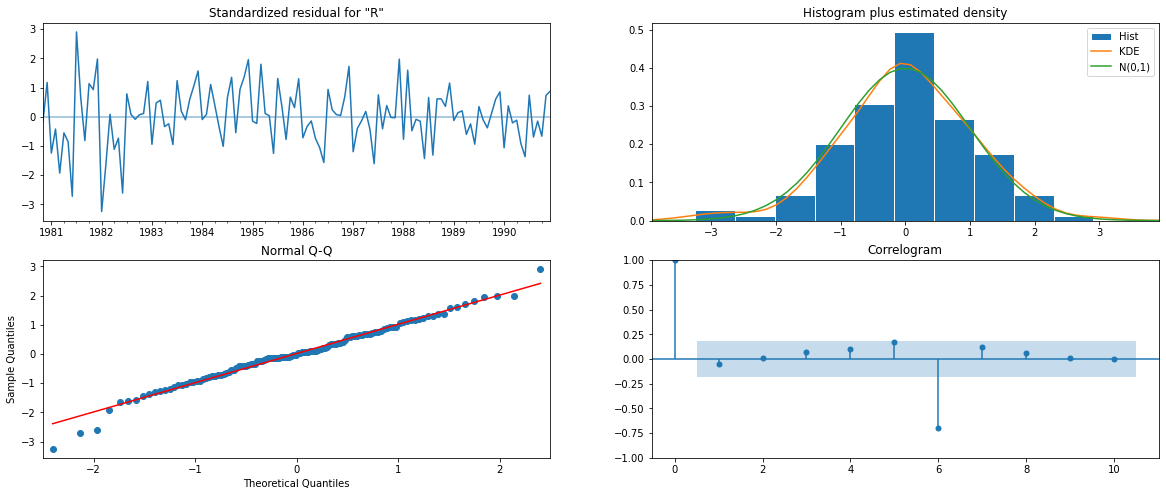

In [139]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [140]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [141]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31.65138712114397 
MAPE: 51.711250860674


In [142]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual_SARIMA(2,1,2)(0,1,0,6)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"Auto_ARIMA(2,1,3)",36.809324
"Manual_ARIMA(2,1,2)",36.871197
"manual_SARIMA(2,1,2)(0,1,0,6)",31.651387


### Build an Automatic version of a SARIMA model

In [143]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [144]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [145]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827372
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.271383062517
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149061
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722171
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312436
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.453362951538
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442577409
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206417448
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139719
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053459826
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917094492183
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.6114741376246
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1026.2970646211156
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:1003.6760779292986
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:1004.5290918309574
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:994.9874170302207
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:997.0369947129183
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.231523179607
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.4126986467888
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1092.4754616553785
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:1018.2581405073978
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.8335862392807
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919131733
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.8188703387214
SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:1003.754115751893
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092125
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.478162738874
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607524156
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763957267038
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC

In [146]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744297
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582102
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205616
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [147]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Wed, 24 Aug 2022   AIC                            951.744
Time:                                   22:40:45   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5028      0.083     -6.082      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.919

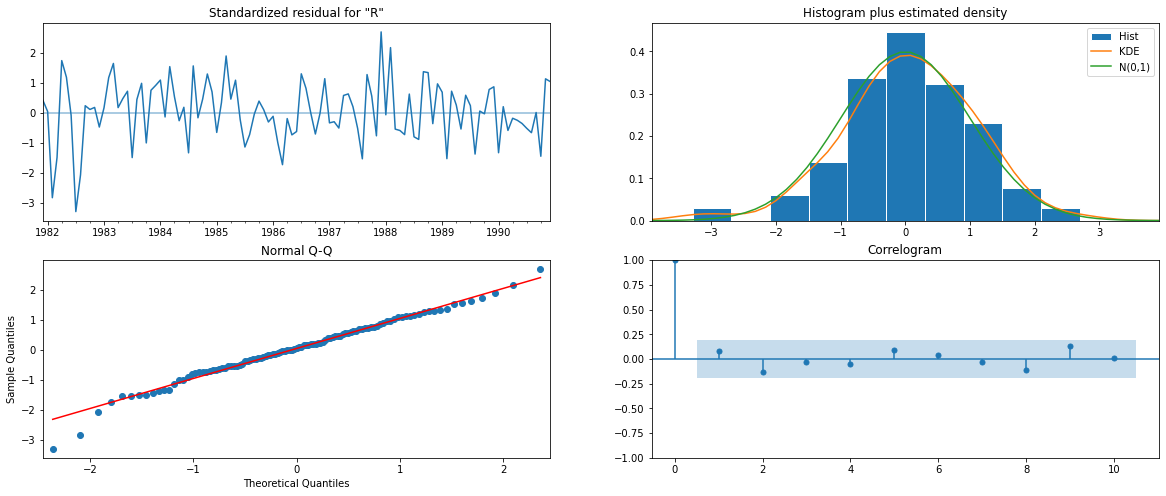

In [148]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [149]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [150]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 27.124535166501488 
MAPE: 55.23994932700531


In [151]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_SARIMA(2,1,3)(2, 0, 3, 6)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"Auto_ARIMA(2,1,3)",36.809324
"Manual_ARIMA(2,1,2)",36.871197
"manual_SARIMA(2,1,2)(0,1,0,6)",31.651387
"Auto_SARIMA(2,1,3)(2, 0, 3, 6)",27.124535


## Q 8: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [152]:
resultsDf.rename(columns = {'RMSE':'Test RMSE'}, inplace = True)

In [153]:
FInal_results = pd.concat([resultsDf,FInal_results])

In [154]:
FInal_results.sort_values(by = "Test RMSE")

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",9.220000
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
RegressionOnTime,15.268955
"Alpha=0.077360,Beta=0.03936496,Gamma=0.00083,TripleExponentialSmoothing",19.113110
"Auto_SARIMA(2,1,3)(2, 0, 3, 6)",27.124535
"manual_SARIMA(2,1,2)(0,1,0,6)",31.651387
"Alpha=0.07,SimpleExponentialSmoothing",36.435772


In [155]:
FInal_results_safe_copy=FInal_results.copy()

## Q 9 : Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [156]:
final_model = ExponentialSmoothing(df_rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.1)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [157]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = final_model.forecast(steps=12)

In [158]:
rmse = mean_squared_error(df_rose['Rose'],final_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 17.023705516791587


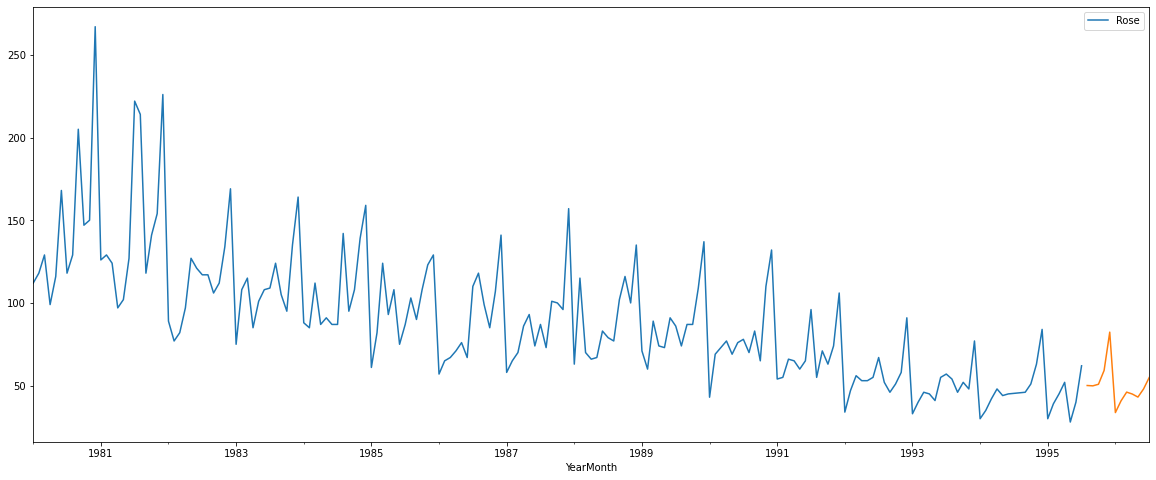

In [159]:
df_rose.plot()
prediction_1.plot();

In [173]:
alpha = 0.05
percentile_lower = (alpha * 100) / 2
percentile_higher = 100 - percentile_lower
print(percentile_lower)
print(percentile_higher)

2.5
97.5


In [160]:

    
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(final_model.resid,ddof=1)})
pred_1_df.head()


,lower_CI,prediction,upper_ci
1995-08-01,16.636544,50.084259,83.531973
1995-09-01,16.427462,49.875177,83.322892
1995-10-01,17.384897,50.832612,84.280326
1995-11-01,25.743386,59.191101,92.638816
1995-12-01,48.902700,82.350415,115.798129


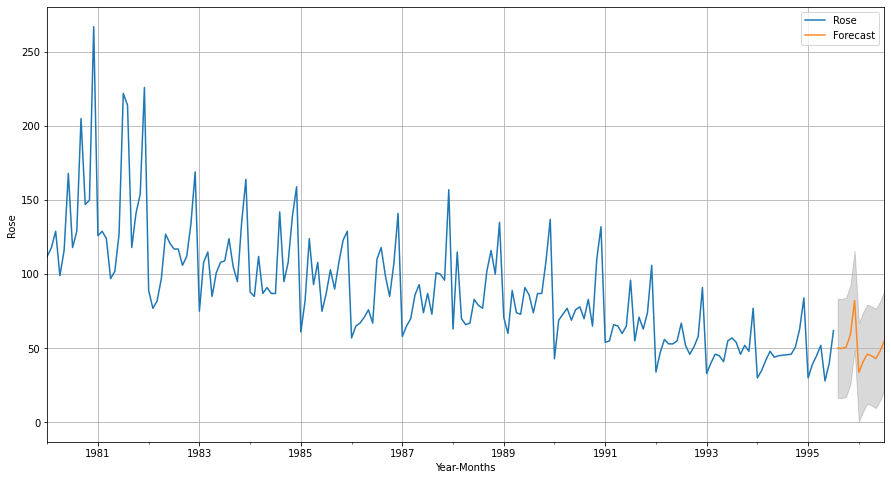

In [180]:
# plot the forecast along with the confidence band

axis = df_rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.9)
##axis.fill_between(pred_1_df.index, pred_1_df.iloc[:, 0], pred_1_df.iloc[:, 1], color='k', alpha=.25)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

## Q 10: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Analysis about the data:

1. This sample data have 187 records , it is a Monthly data , with minimum record available for year 1980-01-01  and maximum record available for 1995-07-01 

3. this is a Sales ata for Rose wine product of Wine manufacturing company , with the mean sales of 90.39 in per Month and Minimum Sales of 28 . whereas max Sales of 267 in any Month.

3. We have also seen that many year's sales have outlier Sales in a few months of each year.

4. We have done upsampling of the data for Quarterly, yearly and a Decade sales, There are seasonality in the data, and it gets flatternout when we Upsample the data

5. We have also done Downsampling of the data for analyzing Daily Sales.

6. Correlogram, histogram, residual and quartiles were plotted.


### Forcasting analysis:

We have built 17 Models on our data and Compared all of them bassed on RMSE value for each Model:
Results with the parameters used for comparisions are as follows:

In [162]:
FInal_results.sort_values(by = "Test RMSE")

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",9.220000
2pointTrailingMovingAverage,11.529278
3pointTrailingMovingAverage,14.126525
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
RegressionOnTime,15.268955
"Alpha=0.077360,Beta=0.03936496,Gamma=0.00083,TripleExponentialSmoothing",19.113110
"Auto_SARIMA(2,1,3)(2, 0, 3, 6)",27.124535
"manual_SARIMA(2,1,2)(0,1,0,6)",31.651387
"Alpha=0.07,SimpleExponentialSmoothing",36.435772


### It is clear that Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing	 has the lower RMSE and NaiveModel	has the hieghest RMSE value of 9.22